In [1]:
pip install scikit-learn==0.18.rc2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==0.18.rc2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0)
ERROR: No matching distribution found for scikit-learn==0.18.rc2


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# mlp.rcParams['font.family'] = 'serif'
%matplotlib inline

from pandas import datetime
import math, time
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable



<ipython-input-3-fe4add78dc44>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

### Load Data

In [5]:
is_cuda = torch.cuda.is_available()

if is_cuda:
  device = torch.device("cuda")
  print("GPU is available")
else:
  device = torch.device("cpu")
  print("GPU not available, CPU used")


GPU not available, CPU used


In [6]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! mkdir ~/.kaggle

In [9]:
! cp IMDB Dataset.csv ~/.kaggle/

cp: cannot stat 'IMDB': No such file or directory
cp: cannot stat 'Dataset.csv': No such file or directory


In [10]:
base_csv = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDBDataset.csv'

In [11]:
df = pd.read_csv(r'IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Splitting the data to train and test data

In [12]:
df.dtypes

review       object
sentiment    object
dtype: object

In [13]:
x, y = df['review'].values, df['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')


shape of train data is (37500,)
shape of test data is (12500,)


### Analysing sentiment

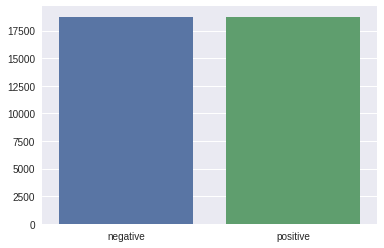

In [14]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative', 'positive']), y = dd.values)
plt.show()

### Tokenization

In [15]:
from pandas.core.internals.blocks import final
def preprocess_string(s):
  s = re.sub(r"[^\w\s]", '', s)
  s = re.sub(r"\s+", '', s)
  s = re.sub(r"\d", '', s)
  return s

def tockenize(x_train, y_train, x_val, y_val):
  word_list = []

  stop_words = set(stopwords.words('english'))
  for sent in x_train:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if word not in stop_words and word != '':
        word_list.append(word)
  
  corpus = Counter(word_list)
  corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]
  onehot_dict = {w:i+1 for i, w in enumerate(corpus_)}
  

  final_list_train,final_list_test = [],[]
  for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
  for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
  encoded_train = [1 if label =='positive' else 0 for label in y_train]  
  encoded_test = [1 if label =='positive' else 0 for label in y_val] 
  return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

  

In [16]:
import nltk
# nltk.download()

from nltk.corpus import brown

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)



<ipython-input-15-27940a7e7272>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict


In [19]:
print(f'Length of vocabulary is {len(vocab)}')




Length of vocabulary is 1000


### Analysing review length

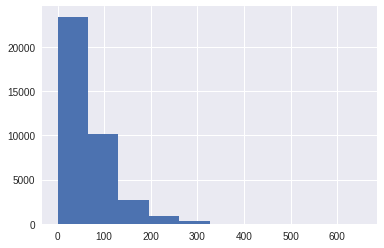

count    37500.000000
mean        69.190240
std         48.178478
min          0.000000
25%         39.000000
50%         54.000000
75%         84.000000
max        653.000000
dtype: float64

In [20]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

### Padding

In [29]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len), dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]

  return features

In [30]:
# We have very less number of reviews with length > 500
# So we will consider only below it.
x_train_pad = padding_(x_train, 500)
x_test_pad = padding_(x_test, 500)


### Batching and loading as tensor

In [31]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)


In [32]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size())
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)


Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[  0,   0,   0,  ..., 445, 952, 446],
        [  0,   0,   0,  ..., 984, 643, 145],
        [  0,   0,   0,  ...,  32, 269, 330],
        ...,
        [  0,   0,   0,  ..., 154, 177,  24],
        [  0,   0,   0,  ..., 208,   8, 676],
        [  0,   0,   0,  ..., 967, 446, 150]])
Sample input: 
 tensor([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0])


### Model

In [33]:
class SentimentRNN(nn.Module):
  def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
    super(SentimentRNN, self).__init__()

    self.output_dim = output_dim
    self.hidden_dim = hidden_dim

    self.no_layers = no_layers
    self.vocab_size = vocab_size

    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=self.hidden_dim, num_layers=no_layers, batch_first=True)

    self.dropout = nn.Dropout(0.3)

    self.fc = nn.Linear(self.hidden_dim, output_dim)
    self.sig = nn.Sigmoid()

  def forward(self, x, hidden):
    batch_size = x.size(0)
    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)

    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

    out = self.dropout(lstm_out)
    out = self.fc(out)

    sig_out = self.sig(out)

    sig_out = sig_out[:, -1]

    return sig_out, hidden

  def init_hidden(self, batch_size):

    h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
    c0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
    hidden = (h0, c0)
    return hidden


In [34]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Training

In [35]:
lr = 0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = lr)

def acc(pred, label):
  pred = torch.round(pred.squeeze())
  return torch.sum(pred == label.squeeze().item())

  

In [36]:
clip = 5
epochs = 5
valid_loss_min = np.Inf

# Train for some number of epochs
epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []

for epoch in range(epochs):
  train_losses = []
  train_acc = 0.0
  model.train()
  # initialize hidden state
  h = model.init_hidden(batch_size)
  for inputs, labels in train_loader:
    
    inputs, labels = inputs.to(device), labels.to(device)
    #creating new variables for the hidden state else backprop through the entire training history
    h = tuple([each.data for each in h])

    model.zero_grad()
    output, h = model(inputs, h)

    loss = criterion(output.squeeze(), labels.float())
    loss.backward()
    train_losses.append(loss.item())
    accuracy = acc(output, labels)
    train_acc += accuracy
    nn.utils.clip_grad_norm_(model.parameters(), clip)
    optimizer.step()

  val_h = model.init_hidden(batch_size)
  val_losses = []
  val_acc = 0.0
  model.eval()
  for inputs, labels in valid_loader:
    val_h = tuple([each.data for each in val_h])

    inputs, labels = inputs.to(device), labels.to(device)

    output, val_h = model(inputs, val_h)
    val_loss = criterion(output.squeeze(), labels.float())
    val_losses.append(val_loss.item())
    accuracy = acc(output, labels)
    val_acc += accuracy

  epoch_train_loss = np.mean(train_losses)
  epoch_val_loss = np.mean(val_losses)
  epoch_train_acc = val_acc/len(valid_loader.dataset)
  epoch_val_acc = val_acc/len(valid_loader.dataset)
  epoch_tr_loss.append(epoch_val_loss)
  epoch_vl_loss.append(epoch_val_loss)
  epoch_tr_loss.append(epoch_train_acc)
  epoch_vl_loss.append(epoch_val_acc)
  print(f'Epoch {epoch+1}')
  print(f'train_loss: {epoch_train_loss} val_loss: {epoch_val_loss}')
  print(f'train_accuracy: {epoch_train_acc*100} val_accuracy: {epoch_val_acc * 100}')
  if epoch_val_loss <= valid_loss_min:
    torch.save(model.state_dict(), '../working/state_dict.pt')

    print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, epoch_val_loss))
  print(25*'==')



ValueError: ignored

In [37]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

ValueError: ignored

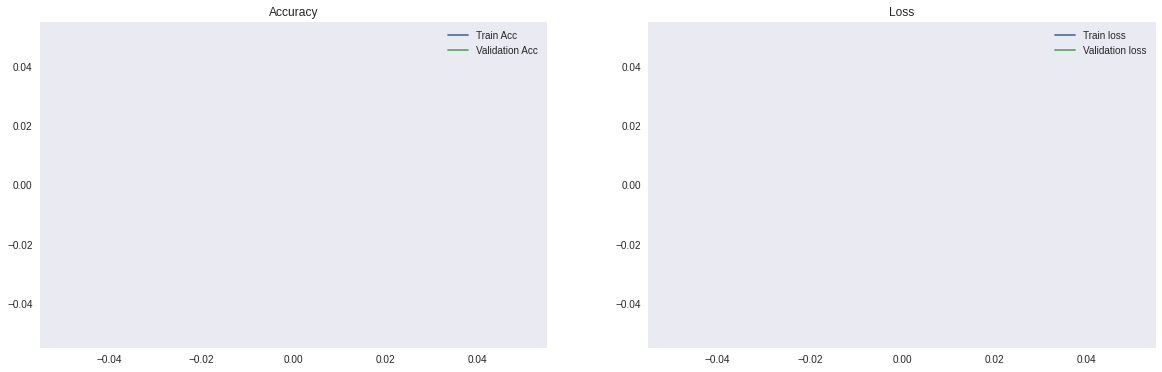

In [38]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

### Inferance

In [39]:
def predict_text(text):
  word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() if preprocess_string(word) in vocab.keys()])
  word_seq = np.expand_dims(word_seq, axis=0)
  pad = torch.from_numpy(padding_(word_seq, 500))
  inputs = pad.to(device)
  batch_size = 1
  h = model.init_hidden(batch_size)
  h = tuple([each.data for each in h])
  output, h = model(inputs, h)
  return(output.item())
  
                  

In [42]:
index = 30
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')


Taut and organically gripping, Edward Dmytryk's Crossfire is a distinctive suspense thriller, an unlikely "message" movie using the look and devices of the noir cycle.<br /><br />Bivouacked in Washington, DC, a company of soldiers cope with their restlessness by hanging out in bars. Three of them end up at a stranger's apartment where Robert Ryan, drunk and belligerent, beats their host (Sam Levene) to death because he happens to be Jewish. Police detective Robert Young investigates with the help of Robert Mitchum, who's assigned to Ryan's outfit. Suspicion falls on the second of the three (George Cooper), who has vanished. Ryan slays the third buddy (Steve Brodie) to insure his silence before Young closes in.<br /><br />Abetted by a superior script by John Paxton, Dmytryk draws precise performances from his three starring Bobs. Ryan, naturally, does his prototypical Angry White Male (and to the hilt), while Mitchum underplays with his characteristic alert nonchalance (his role, howeve

ValueError: ignored

In [45]:
index = 32
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is: {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1-pro) if status == "negative" else pro
print(f'predicted sentiment is {status} with a probability of {pro}')


My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.
Actual sentiment is: negative


ValueError: ignored